Data Loading:
   StudentID  Age group  Gender  Ethnicity  Parenting training  \
0       1001         17       1          0                   2   
1       1002         18       0          0                   1   
2       1003         15       0          2                   3   
3       1004         17       1          0                   3   
4       1005         17       1          0                   2   

   weeklystudytime  Absent  mentoring  Parentalassist  other interests  Play  \
0        19.833723       7          1               2                0     0   
1        15.408756       0          0               1                0     0   
2         4.210570      26          0               2                0     0   
3        10.028829      14          0               3                1     0   
4         4.672495      17          1               3                0     0   

   songs  Volunteering    Result  Grade  
0      1             0  2.929196      2  
1      0             0  

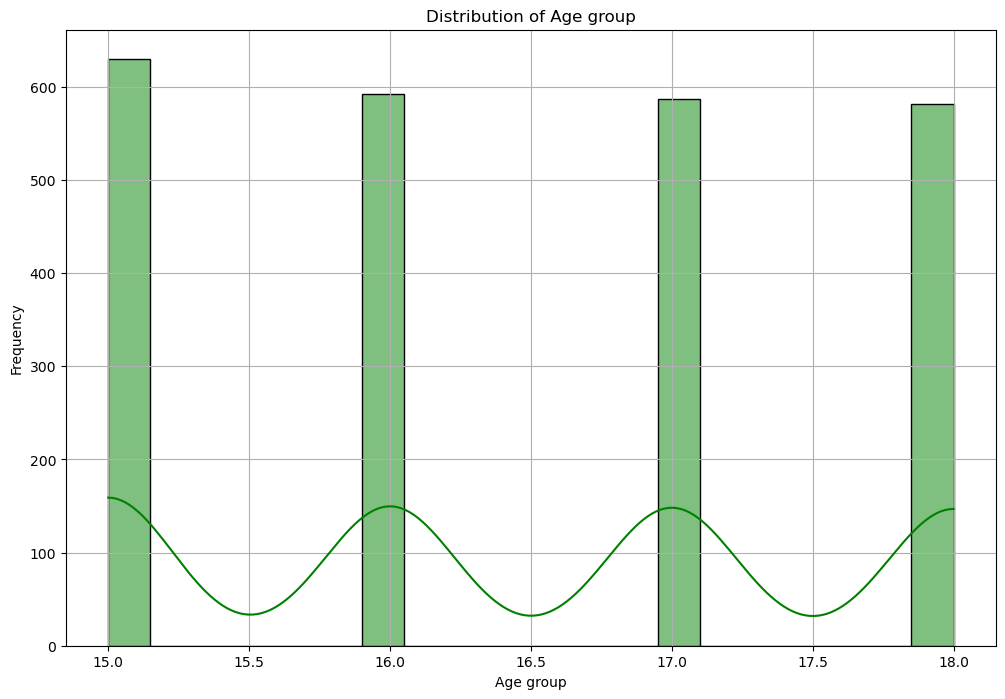

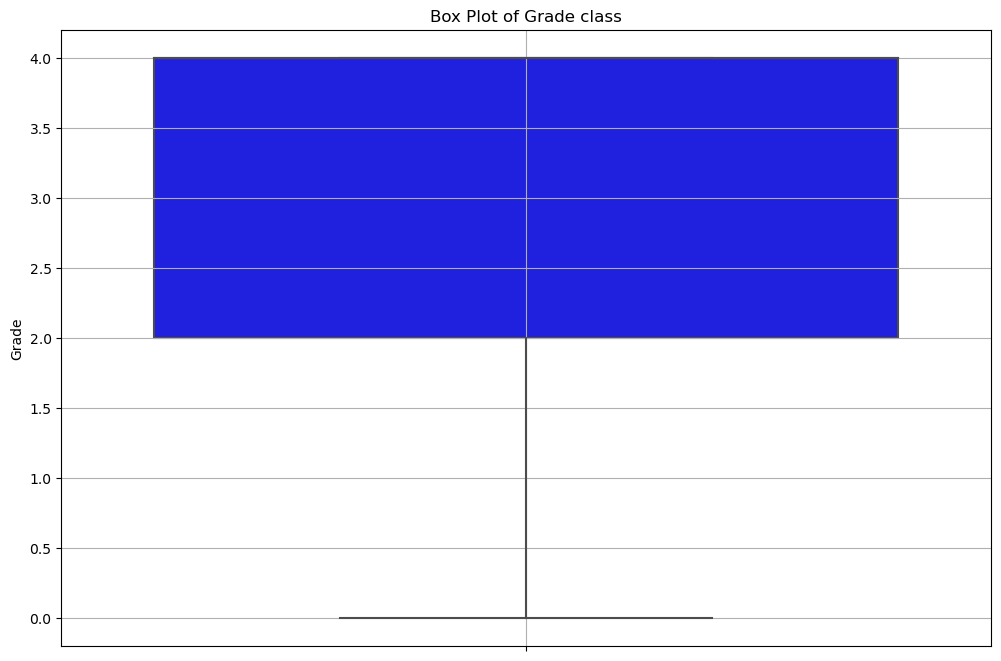

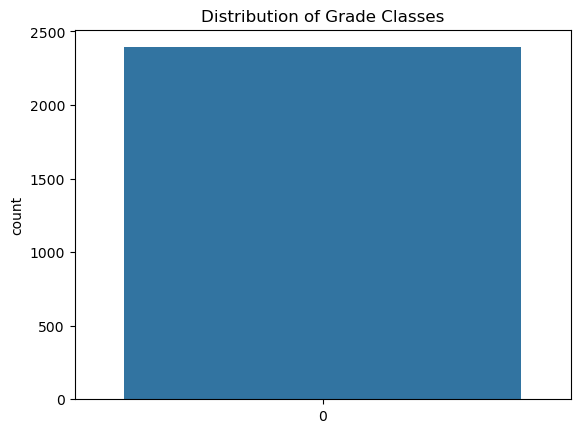

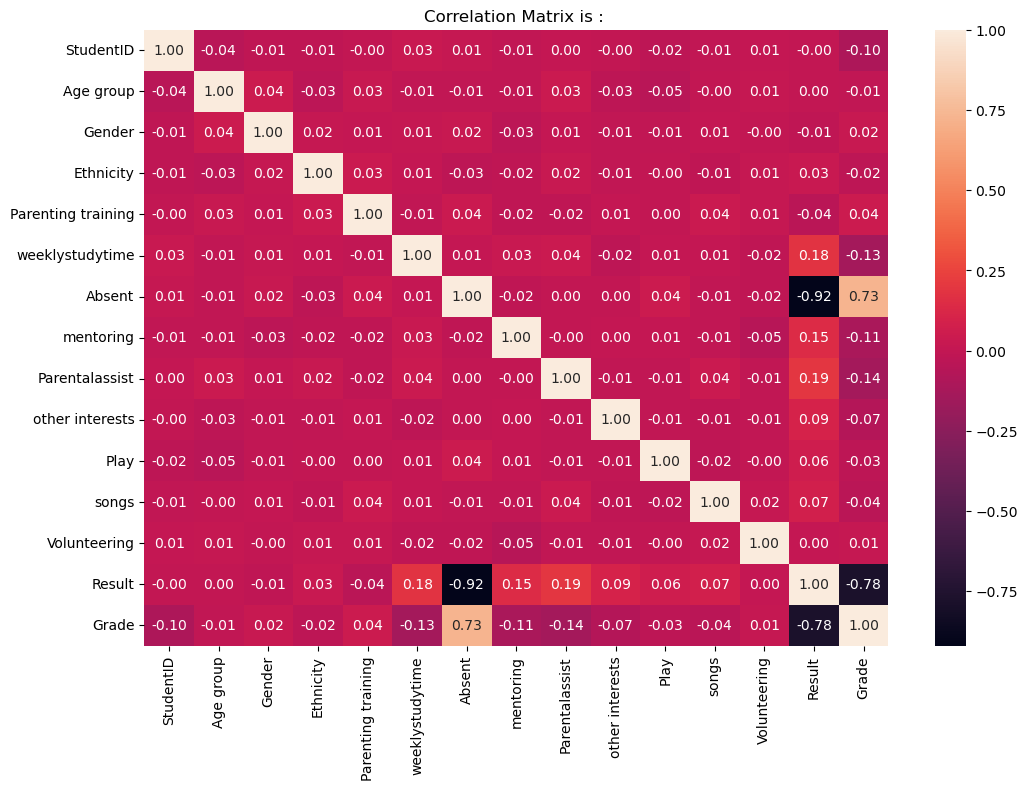


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.26      0.22      0.24        49
           2       0.45      0.54      0.49        85
           3       0.31      0.12      0.17        86
           4       0.79      0.99      0.88       237

    accuracy                           0.63       479
   macro avg       0.36      0.37      0.36       479
weighted avg       0.55      0.63      0.58       479

Confusion Matrix is : 
[[  0  15   3   1   3]
 [  3  11  30   1   4]
 [  0  14  46  19   6]
 [  0   2  23  10  51]
 [  0   0   1   1 235]]
Accuracy using Logistic Regression :  0.6304801670146137


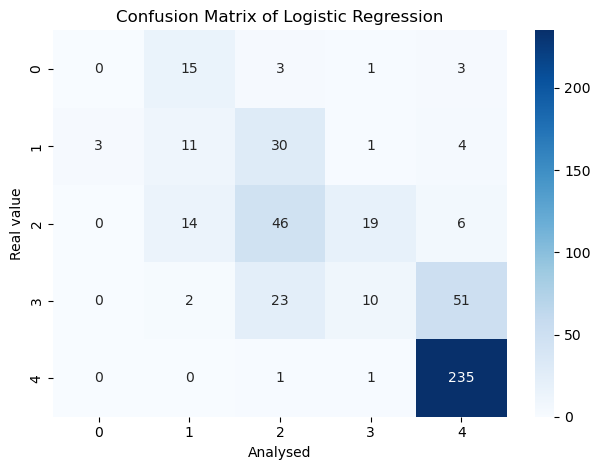


Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.41      0.55        22
           1       0.80      0.88      0.83        49
           2       0.94      0.87      0.90        85
           3       0.89      0.90      0.89        86
           4       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479

Confusion Matrix is : 
[[  9   6   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]
Accuracy using Random Forest :  0.9102296450939458


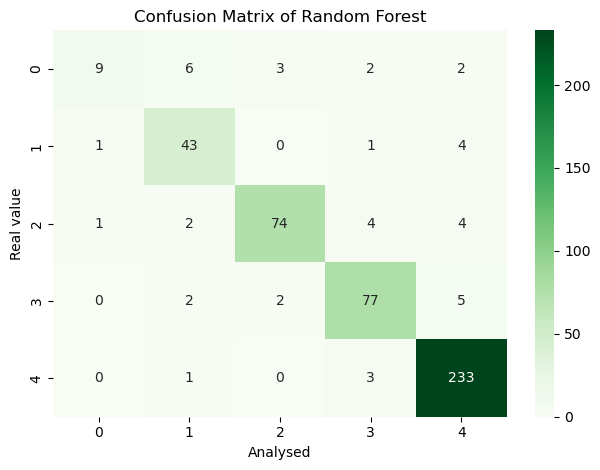


SVM Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.58      0.80      0.67        49
           2       0.80      0.71      0.75        85
           3       0.76      0.79      0.77        86
           4       0.92      0.96      0.94       237

    accuracy                           0.82       479
   macro avg       0.61      0.65      0.63       479
weighted avg       0.79      0.82      0.80       479

Confusion Matrix is : 
[[  0  15   3   2   2]
 [  0  39   5   1   4]
 [  0  10  60  10   5]
 [  0   2   7  68   9]
 [  0   1   0   9 227]]
Accuracy using SVM :  0.8225469728601252


C:\Users\SHRINIVAS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHRINIVAS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHRINIVAS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


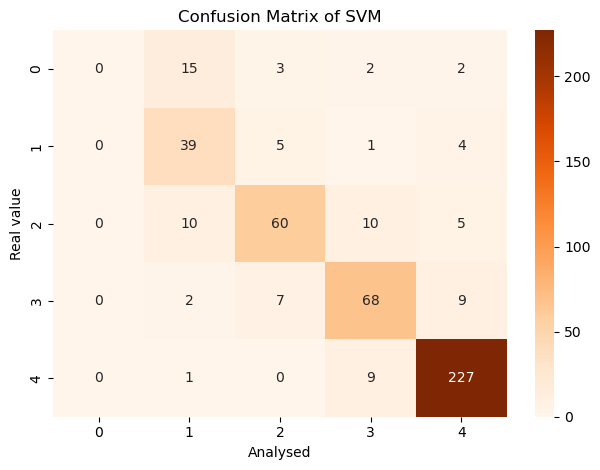

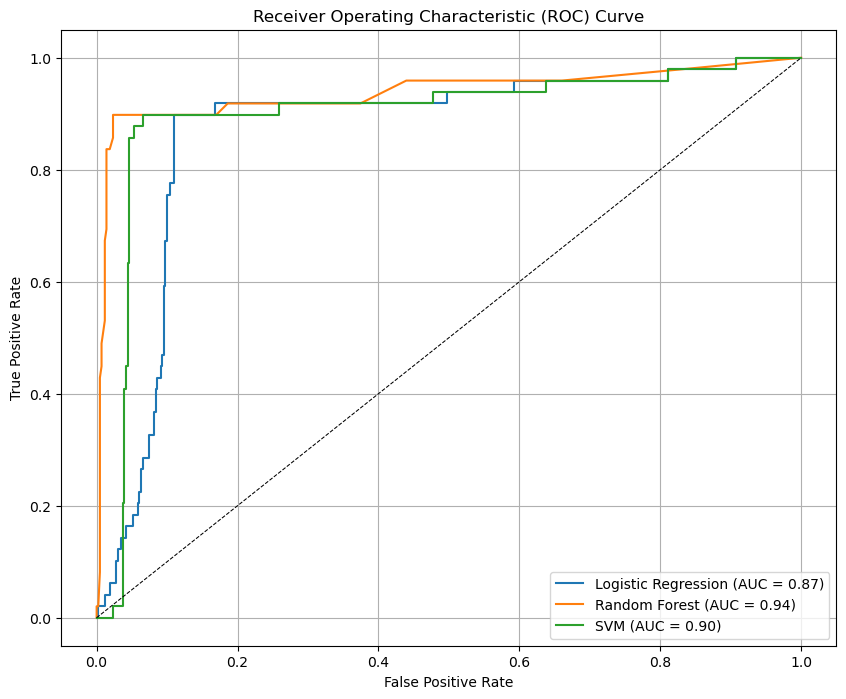

In [51]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Load student performance data
print("Data Loading:")
df = pd.read_csv(r"C:\Users\SHRINIVAS\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Student_performance_data.csv")

# Initial exploration
print(df.head())  # View first few rows to understand data structure

# Missing value analysis
print("\nMissing Value Analysis:")
print(df.isnull().sum())  # Identify missing data distribution

# Address missing values (consider potential biases)
print("\nMissing Value Handling:")
df = df.dropna(subset=['Grade'])  # Drop rows with missing grades (explain potential bias)


# Separate features and target variable
A = df.drop(['StudentID', 'Grade'], axis=1)
B = df['Grade']

# Split data into training and testing sets
A_training, A_testing, B_training, B_testing = train_test_split(A, B, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
A_training = scaler.fit_transform(A_training)
A_testing = scaler.transform(A_testing)
print("\nFeature Scaling:")
print(A_training[:5])  # View a few scaled features

# EDA(Exploratory Data Analysis)
print("\nEDA:")

# Histogram of Age group
plt.figure(figsize=(12, 8))
sns.histplot(df['Age group'], kde=True, bins=20, color='green')
plt.title('Distribution of Age group')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Box Plot of Grade class
plt.figure(figsize=(12, 8))
sns.boxplot(y=df['Grade'], color='blue')
plt.title('Box Plot of Grade class')
plt.ylabel('Grade')
plt.grid(True)
plt.show()

# Analyze target variable distribution
sns.countplot(B)
plt.title('Distribution of Grade Classes')
plt.show()

# Investigate feature relationships using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix is : ')
plt.show()

# Model Training and Evaluation

# Logistic Regression
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(A_training, B_training)
B_pred_log_reg = log_reg.predict(A_testing)

# Performance evaluation
print("\nLogistic Regression Report:")
print(classification_report(B_testing, B_pred_log_reg))
print("Confusion Matrix is : ")
print(confusion_matrix(B_testing, B_pred_log_reg))
print("Accuracy using Logistic Regression : ", accuracy_score(B_testing, B_pred_log_reg))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(B_testing, B_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Analysed')
plt.ylabel('Real value')
plt.tight_layout()
plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(A_training, B_training)
B_pred_rf = rf.predict(A_testing)

print("\nRandom Forest Report:")
print(classification_report(B_testing, B_pred_rf))
print("Confusion Matrix is : ")
print(confusion_matrix(B_testing, B_pred_rf))
print("Accuracy using Random Forest : ", accuracy_score(B_testing, B_pred_rf))

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(B_testing, B_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Analysed')
plt.ylabel('Real value')
plt.tight_layout()
plt.show()

# SVM
# Model instantiation 
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)  # Adjust C or explore other hyperparameters

# Model training
svm_model.fit(A_training, B_training)

# Model predictions
B_pred_svm = svm_model.predict(A_testing)
print("\nSVM Report:")
print(classification_report(B_testing, B_pred_svm))
print("Confusion Matrix is : ")
print(confusion_matrix(B_testing, B_pred_svm))
print("Accuracy using SVM : ", accuracy_score(B_testing, B_pred_svm))

# Confusion Matrix for SVM
sns.heatmap(confusion_matrix(B_testing, B_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix of SVM')
plt.xlabel('Analysed')
plt.ylabel('Real value')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fig, ax = plt.subplots(figsize=(10, 8))

# Logistic Regression
B_prob_log_reg = log_reg.predict_proba(A_testing)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(B_testing, B_prob_log_reg, pos_label=log_reg.classes_[1])
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
ax.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')

# Random Forest
B_prob_rf = rf.predict_proba(A_testing)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(B_testing, B_prob_rf, pos_label=rf.classes_[1])
auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# SVM
B_prob_svm = svm_model.predict_proba(A_testing)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(B_testing, B_prob_svm, pos_label=svm_model.classes_[1])
auc_svm = auc(fpr_svm, tpr_svm)
ax.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Plotting details
ax.plot([0, 1], [0, 1], 'k--', lw=0.75)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.grid(True)
plt.show()

